# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1. Is the distribution of body temperatures normal?

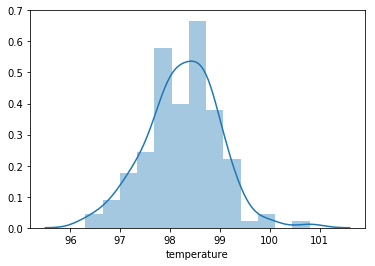

In [5]:
_ = sns.distplot(df['temperature'])

Plotting the empirical CDF suggests that the distribution is normal: 

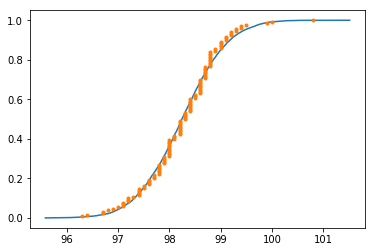

In [6]:
mu = np.mean(df['temperature'])
sigma = np.std(df['temperature'])
samples = np.random.normal(mu, sigma, 10000)

x_theor = np.sort(samples)
n = len(samples)
y_theor = np.arange(1, n+1)/n

x = np.sort(df['temperature'])
y = np.arange(1,131)/130

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x,y, marker='.', linestyle='none')

plt.show()

Now we try the combined D'Agostino and Pearson tests provided by scipy.stats. 

The null hypothesis is: The temperature sample comes from a normal distribution. 

Since the p-value is >.05, we fail to reject the null hypothesis. 

In [16]:
from scipy.stats import normaltest
normaltest(df['temperature'])

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

## 2. Is the sample size large? Are the observations independent?

In [7]:
df.shape

(130, 3)

130>= 30, so the sample size itself is large enough to apply CLT. 

Temperature observations in individuals are independent assuming good methodology. [This link](https://ww2.amstat.org/publications/jse/v4n2/datasets.shoemaker.html) explains how the data was obtained: it was back-engineered from a histogram. Each of the 130 samples is supposed to correspond to the temperature of a certain individual, so the observations are independent. 

## 3. Is the true population mean really 98.6 degrees F? 

### First method: bootstrap

In [10]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

In [11]:
bs_replicates = draw_bs_reps(df.temperature, np.mean, 10000)

In [16]:
np.mean(bs_replicates)

98.2498433076923

In [15]:
np.percentile(bs_replicates,[2.5, 97.5])

array([98.12230769, 98.37384615])

The bootstrap method suggests that the population mean is closer to 98.25 degrees F

### Second method: Frequentist statistical testing. 

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 

## 5. At what temperature should we consider someone's temperature to be "abnormal"? 

## 6. Is there a significant difference between males and females in normal temperature? 